## Regressão linear - preços de carros
***

**Fonte**: https://www.kaggle.com/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv  

O objetivo é criar um modelo de machine learning utilizando a técnica de **Regressão Linear**, que faça previsões sobre os preços de carros a partir das características apresentadas no dataset.

In [270]:
import pandas as pd

In [271]:
dados = pd.read_csv('CarPrice_Assignment.csv')
dados.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Estatísticas descritivas e tabela de correlação

In [272]:
dados.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [273]:
dados.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


As que possuem um nivel maior de correlação são:
- wheelbase (distância dos eixos)
- carlength (compriemnto do carro)
- carheight (altura do carro)
- curbweight (peso-meio-fio)
- enginesize (tamanho do motor)
- boreratio (razão de furo)
- horsepower (cavalos)
- citympg
- highwaympg

#### Selecionando e trocando nomes das variáveis

In [274]:
dados_carros = dados[['price', 'wheelbase', 'carlength',
                      'carheight', 'curbweight', 'enginesize', 'boreratio',
                      'horsepower', 'citympg', 'highwaympg']]

In [275]:
dados_carros.columns = ['preco', 'dist_dos_eixos', 'comp_do_carro', 'alt_do_carro',
                        'peso_meio_fio', 'tam_do_motor', 'razao_de_furo', 'cavalos', 'citympg', 'highwaympg']
dados_carros.head()

,preco,dist_dos_eixos,comp_do_carro,alt_do_carro,peso_meio_fio,tam_do_motor,razao_de_furo,cavalos,citympg,highwaympg
0,13495.0,88.6,168.8,48.8,2548,130,3.47,111,21,27
1,16500.0,88.6,168.8,48.8,2548,130,3.47,111,21,27
2,16500.0,94.5,171.2,52.4,2823,152,2.68,154,19,26
3,13950.0,99.8,176.6,54.3,2337,109,3.19,102,24,30
4,17450.0,99.4,176.6,54.3,2824,136,3.19,115,18,22


### Análises gráficas

#### Box plot da variável *dependente* (y)

In [276]:
import seaborn as sns

<AxesSubplot:title={'left':'Variável y'}, xlabel='Preços'>

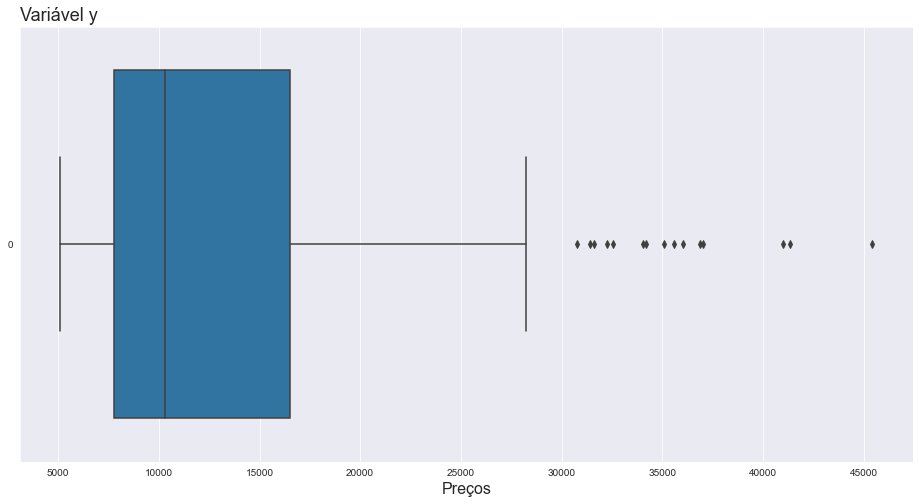

In [277]:
sns.set_style('darkgrid')
grafico = sns.boxplot(data = dados_carros.preco, orient = 'h')
grafico.figure.set_size_inches(16,8)
grafico.set_title('Variável y', fontsize = 18, loc = 'left')
grafico.set_xlabel('Preços', fontsize = 16)
grafico

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'left':'Distribuição variável preço'}, xlabel='Preços', ylabel='Density'>

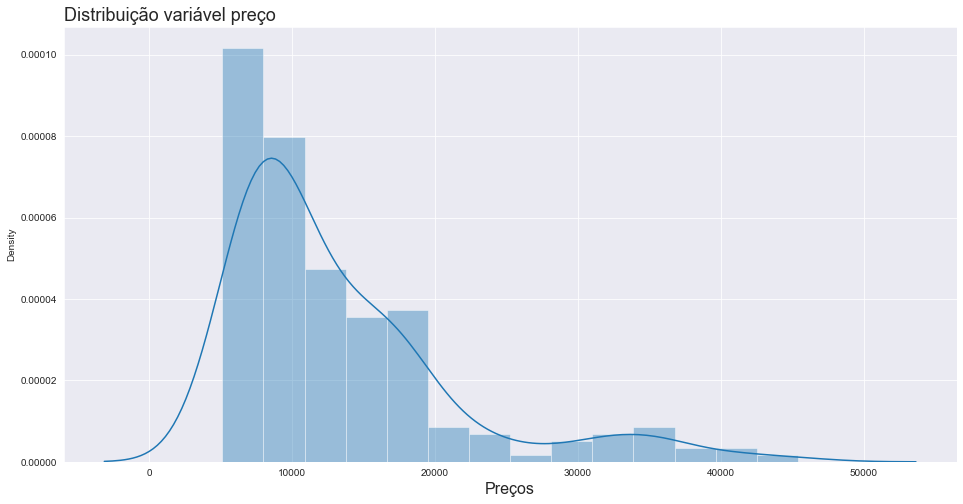

In [278]:
grafico = sns.distplot(dados_carros.preco)
grafico.figure.set_size_inches(16, 8)
grafico.set_title('Distribuição variável preço', fontsize = 18, loc = 'left')
grafico.set_xlabel('Preços', fontsize = 16)
grafico

Com o distplot, é possível perceber que a variável y possui uma distribuição assimétrica à direita.

### Gráficos de dispersão entre as variáveis

In [279]:
dados_carros.head(2)

,preco,dist_dos_eixos,comp_do_carro,alt_do_carro,peso_meio_fio,tam_do_motor,razao_de_furo,cavalos,citympg,highwaympg
0,13495.0,88.6,168.8,48.8,2548,130,3.47,111,21,27
1,16500.0,88.6,168.8,48.8,2548,130,3.47,111,21,27


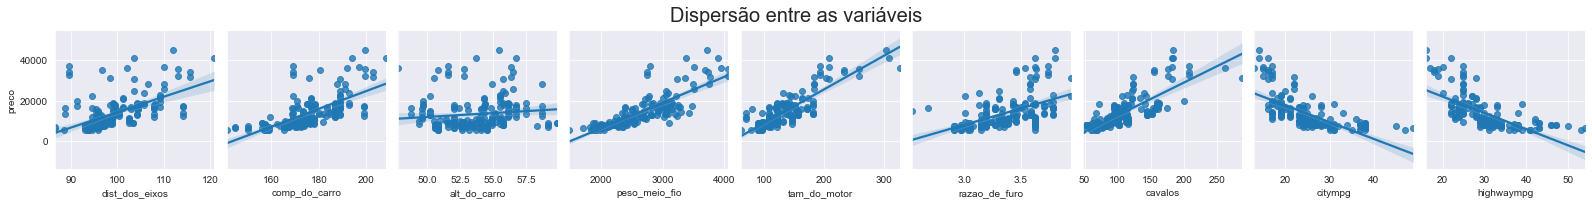

In [280]:
grafico = sns.pairplot(dados_carros, y_vars = 'preco',
                      x_vars = ['dist_dos_eixos', 'comp_do_carro', 'alt_do_carro',
                        'peso_meio_fio', 'tam_do_motor', 'razao_de_furo', 'cavalos', 'citympg', 'highwaympg'],
                      kind = 'reg')
grafico.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.1)
grafico

Os gráficos mostram que os preços dos carros aumentam conforme aumenta o valor das variáveis explicativas x.

## Aplicando a transformação logarítmica aos dados do *dataset*


In [281]:
import numpy as np

In [282]:
dados_carros['log_preco'] = np.log(dados_carros.preco)
dados_carros['log_dist_dos_eixos'] = np.log(dados_carros.dist_dos_eixos)
dados_carros['log_comp_do_carro'] = np.log(dados_carros.comp_do_carro)
dados_carros['log_alt_do_carro'] = np.log(dados_carros.alt_do_carro)
dados_carros['log_peso_meio_fio'] = np.log(dados_carros.peso_meio_fio)
dados_carros['log_tam_do_motor'] = np.log(dados_carros.tam_do_motor)
dados_carros['log_razao_de_furo'] = np.log(dados_carros.razao_de_furo)
dados_carros['log_cavalos'] = np.log(dados_carros.cavalos)
dados_carros['log_citympg'] = np.log(dados_carros.citympg)
dados_carros['log_highwaympg'] = np.log(dados_carros.highwaympg)

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [283]:
dados_carros.head()

,preco,dist_dos_eixos,comp_do_carro,alt_do_carro,peso_meio_fio,tam_do_motor,razao_de_furo,cavalos,citympg,highwaympg,log_preco,log_dist_dos_eixos,log_comp_do_carro,log_alt_do_carro,log_peso_meio_fio,log_tam_do_motor,log_razao_de_furo,log_cavalos,log_citympg,log_highwaympg
0,13495.0,88.6,168.8,48.8,2548,130,3.47,111,21,27,9.510075,4.484132,5.128715,3.887730,7.843064,4.867534,1.244155,4.709530,3.044522,3.295837
1,16500.0,88.6,168.8,48.8,2548,130,3.47,111,21,27,9.711116,4.484132,5.128715,3.887730,7.843064,4.867534,1.244155,4.709530,3.044522,3.295837
2,16500.0,94.5,171.2,52.4,2823,152,2.68,154,19,26,9.711116,4.548600,5.142832,3.958907,7.945555,5.023881,0.985817,5.036953,2.944439,3.258097
3,13950.0,99.8,176.6,54.3,2337,109,3.19,102,24,30,9.543235,4.603168,5.173887,3.994524,7.756623,4.691348,1.160021,4.624973,3.178054,3.401197
4,17450.0,99.4,176.6,54.3,2824,136,3.19,115,18,22,9.767095,4.599152,5.173887,3.994524,7.945910,4.912655,1.160021,4.744932,2.890372,3.091042


### Análises gráficas da variável dependente transformada

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'left':'Distribuição variável dependente transformada'}, xlabel='Preços', ylabel='Density'>

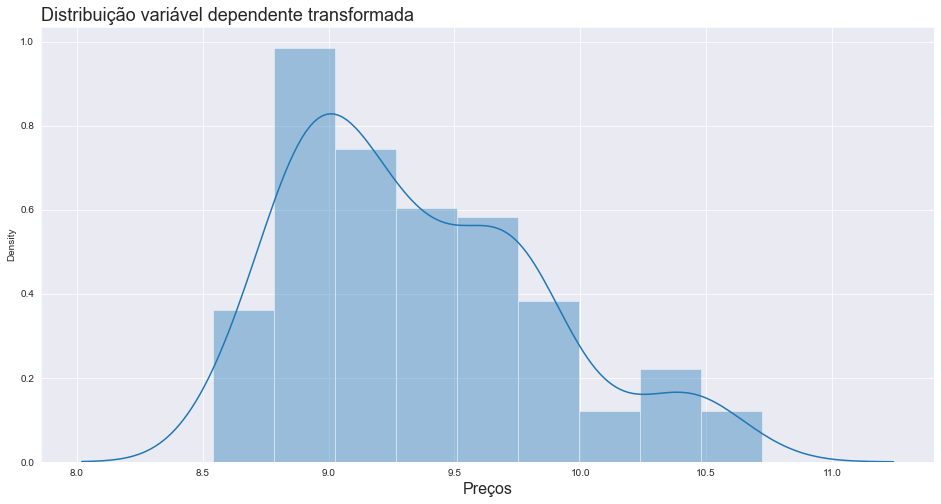

In [284]:
grafico = sns.distplot(dados_carros.log_preco)
grafico.figure.set_size_inches(16, 8)
grafico.set_title('Distribuição variável dependente transformada', fontsize = 18, loc = 'left')
grafico.set_xlabel('Preços', fontsize = 16)
grafico

### Gráficos de dispersão entre as variáveis transformadas

In [285]:
dados_carros.columns

Index(['preco', 'dist_dos_eixos', 'comp_do_carro', 'alt_do_carro',
       'peso_meio_fio', 'tam_do_motor', 'razao_de_furo', 'cavalos', 'citympg',
       'highwaympg', 'log_preco', 'log_dist_dos_eixos', 'log_comp_do_carro',
       'log_alt_do_carro', 'log_peso_meio_fio', 'log_tam_do_motor',
       'log_razao_de_furo', 'log_cavalos', 'log_citympg', 'log_highwaympg'],
      dtype='object')

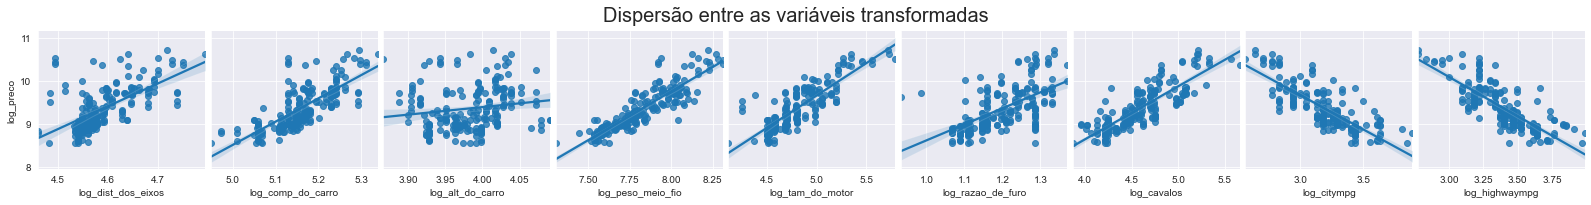

In [286]:
grafico = sns.pairplot(dados_carros, y_vars = 'log_preco',
                      x_vars = ['log_dist_dos_eixos', 'log_comp_do_carro',
                               'log_alt_do_carro', 'log_peso_meio_fio', 'log_tam_do_motor',
                               'log_razao_de_furo', 'log_cavalos', 'log_citympg', 'log_highwaympg'],
                      kind = 'reg')
grafico.fig.suptitle('Dispersão entre as variáveis transformadas', fontsize = 20, y = 1.1)
grafico

## Criando datasets de treino e teste

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [288]:
variavel_y = dados_carros['log_preco']
variaveis_x = dados_carros[['log_dist_dos_eixos', 'log_comp_do_carro',
               'log_alt_do_carro', 'log_peso_meio_fio', 'log_tam_do_motor',
               'log_razao_de_furo', 'log_cavalos', 'log_citympg', 'log_highwaympg']]

In [289]:
X_treino, X_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size = 0.3, random_state = 2811)

### Importando biblioteca statsmodels e estimando modelo

In [290]:
import statsmodels.api as sm

In [291]:
X_treino_com_const = sm.add_constant(X_treino)

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [292]:
modelo_do_statsmodels = sm.OLS(y_treino, X_treino_com_const, hasconst = True).fit()

### Avaliando modelo

In [293]:
modelo_do_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_preco   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     81.73
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           8.33e-50
Time:                        18:07:57   Log-Likelihood:                 38.956
No. Observations:                 143   AIC:                            -57.91
Df Residuals:                     133   BIC:                            -28.28
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.4253      2.557     -2.122      0.036     -10.484      -0.367
log_dist_dos_eixos     1.4678      0.650      2.258      0.026       0.182       2.754
log_comp_do_carro     -0.4702      0.661     -0.712      0.478      -1.777       0.837
log_alt_do_carro      -0.2101      0.504     -0.417      0.677      -1.207       0.787
log_peso_meio_fio      1.0684      0.282      3.794      0.000       0.511       1.625
log_tam_do_motor       0.2772      0.140      1.976      0.050      -0.000       0.555
log_razao_de_furo     -0.2277      0.254     -0.898      0.371      -0.729       0.274
log_cavalos            0.3867      0.146      2.647      0.009       0.098       0.676
log_citympg           -0.7064      0.309     -2.284      0.024      -1.318      -0.095
log_highwaympg         0.6903      0.324      2.129      0.035       0.049       1.332
==============================================================================
Omnibus:                        6.398   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.956
Skew:                           0.453   Prob(JB):                       0.0509
Kurtosis:                       3.425   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Aqui é possível perceber que o P>|t| (teste de significância individual dos parametros) de algumas variáveis está acima de 0.05 e esse valor pode gerar alguns problemas no modelo. Então deve ser feita a retirada dessas variáveis.

## Modificando o modelo

In [294]:
variaveis_x = dados_carros[['log_dist_dos_eixos', 'log_peso_meio_fio', 'log_tam_do_motor',
                           'log_cavalos', 'log_citympg', 'log_highwaympg']]

In [295]:
X_treino, X_teste, y_treino, y_teste = train_test_split(variaveis_x, variavel_y, test_size = 0.3, random_state = 2811)

In [296]:
X_treino_com_const = sm.add_constant(X_treino)
modelo_do_statsmodels = sm.OLS(y_treino, X_treino_com_const, hasconst = True).fit()

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [297]:
modelo_do_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_preco   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.72e-52
Time:                        18:07:57   Log-Likelihood:                 37.951
No. Observations:                 143   AIC:                            -61.90
Df Residuals:                     136   BIC:                            -41.16
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.0868      2.335     -2.606      0.010     -10.705      -1.468
log_dist_dos_eixos     1.0662      0.504      2.115      0.036       0.069       2.063
log_peso_meio_fio      0.9231      0.252      3.666      0.000       0.425       1.421
log_tam_do_motor       0.2687      0.138      1.940      0.054      -0.005       0.543
log_cavalos            0.4135      0.137      3.008      0.003       0.142       0.685
log_citympg           -0.6490      0.295     -2.198      0.030      -1.233      -0.065
log_highwaympg         0.6439      0.317      2.034      0.044       0.018       1.270
==============================================================================
Omnibus:                        4.980   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.482
Skew:                           0.407   Prob(JB):                        0.106
Kurtosis:                       3.300   Cond. No.                     1.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Estimando modelo com os novos dados de treino

In [298]:
modelo = LinearRegression()

In [299]:
modelo.fit(X_treino, y_treino)

LinearRegression()

### Obtendo o coeficiente de determinação (R²)

In [300]:
print(f'R² = {modelo.score(X_treino, y_treino)}')

R² = 0.8447134775548316


O coeficiente de determinação mostra quanto a linha de regressão está ajustada aos dados e varia entre 1 e 0.
> 0.8447 é um valor muito bom.

### Obtendo o coeficiente de determinação (R²) das previsões

In [301]:
previsao = modelo.predict(X_teste)

#### Obtendo o coeficiente de determinação (R²) para as previsões

In [302]:
print(f'R² = {metrics.r2_score(y_teste, previsao)}')

R² = 0.8449887014912074


### Gerando previsões pontuais

Lembrando que os valores foram transformados com $log$, então será preciso aplicar $exp$ (exponencial).

In [303]:
entrada = X_teste[41:42]
entrada

,log_dist_dos_eixos,log_peso_meio_fio,log_tam_do_motor,log_cavalos,log_citympg,log_highwaympg
169,4.589041,7.844241,4.983607,4.75359,3.178054,3.401197


In [304]:
modelo.predict(entrada)[0] #valor em log

9.479788104175933

In [305]:
np.exp(modelo.predict(entrada)[0]) #valor em exp

13092.411992802625

### Simulador simples

In [306]:
dist_dos_eixos = 84
peso_meio_fio = 2000
tam_do_motor = 100
cavalos = 65
citympg = 107
highwaympg = 27
entrada = [[np.log(dist_dos_eixos), np.log(peso_meio_fio), np.log(tam_do_motor),
            np.log(cavalos), np.log(citympg), np.log(highwaympg)]]

In [307]:
print(f'R${np.exp(modelo.predict(entrada)[0]):.2f}')

R$2224.64


### Obtendo métricas do modelo

In [308]:
erro_quadratico_medio = metrics.mean_squared_error(y_teste, previsao).round(2)

In [309]:
raiz_do_erro = np.sqrt(erro_quadratico_medio).round(2)

In [310]:
coeficiente_de_determinacao = metrics.r2_score(y_teste, previsao).round(2)

In [311]:
pd.DataFrame([erro_quadratico_medio,
              raiz_do_erro,
              coeficiente_de_determinacao], 
             ['Erro quad. médio', 'Raiz do erro', 'R²'],
             columns = ['Métricas'])

,Métricas
Erro quad. médio,0.05
Raiz do erro,0.22
R²,0.84


### Coeficientes estimados

#### Intercepto

O intercepto é o **efeito médio** nos **preços dos carros** com todas as variáveis explicativas excluídas do modelo.

In [312]:
modelo.intercept_

-6.086750573087379

In [313]:
np.exp(modelo.intercept_)

0.0022727821684468954

#### Coeficientes de regressão

In [314]:
variaveis_x.columns

Index(['log_dist_dos_eixos', 'log_peso_meio_fio', 'log_tam_do_motor',
       'log_cavalos', 'log_citympg', 'log_highwaympg'],
      dtype='object')

In [315]:
modelo.coef_

array([ 1.06622348,  0.92310132,  0.26868967,  0.41354551, -0.64896354,
        0.64393153])

#### Criando um DataFrame para armazenar os dados

In [316]:
index = ['Intercepto', 'Log Distância dos Eixos', 'Log Peso meio fio', 'Log Tamanho do motor',
         'Log Cavalos', 'Log citympg', 'Log highwaympg']

In [317]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,-6.086751
Log Distância dos Eixos,1.066223
Log Peso meio fio,0.923101
Log Tamanho do motor,0.268690
Log Cavalos,0.413546
Log citympg,-0.648964
Log highwaympg,0.643932


### Interpretação de alguns coeficientes

**Intercepto**: se retirarmos o efeito das variáveis explicativas, o efeito médio no preço dos carros seria de R$0,002.  

**Peso meio fio**: mantendo as outras variáveis explicativas constantes, um acréssimo de 1% no peso meio fio de um carro gera, em média, um acrécimo de 0,92% no preço do carro.

**Tamanho do motor**: mantendo as outras variáveis explicativas constantes, um acréssimo de 1% no tamanho do motor de um carro gera, em média, um acrécimo de 0,26% no preço do carro.

**Cavalos**: mantendo as outras variáveis explicativas constantes, um acréssimo de 1% no número de cavalos de um carro gera, em média, um acrécimo de 0,41% no preço do carro.

Para os outros coeficientes a interpretação é a mesma.

## Análises Gráficas dos resultados

In [318]:
y_previsto_treino = modelo.predict(X_treino)

### Gráfico de dispersão - Valor estimado X valor real

<AxesSubplot:title={'center':'Valor estimado X valor real'}, xlabel='log Preço - Previsão', ylabel='log Preço - Real'>

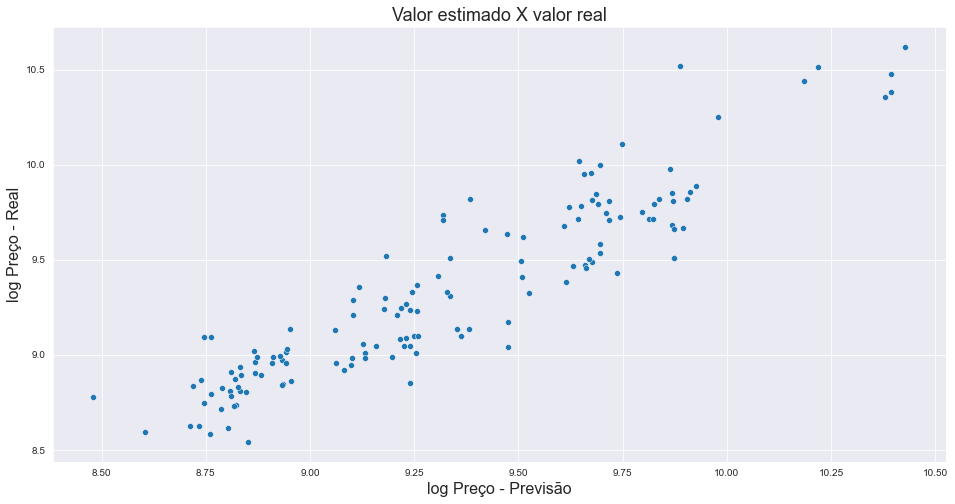

In [319]:
grafico = sns.scatterplot(x = y_previsto_treino, y = y_treino)
grafico.figure.set_size_inches(16, 8)
grafico.set_title('Valor estimado X valor real', fontsize = 18)
grafico.set_xlabel('log Preço - Previsão', fontsize = 16)
grafico.set_ylabel('log Preço - Real', fontsize = 16)
grafico

### Obtedo resíduos

In [320]:
residuo = y_treino - y_previsto_treino

C:\Users\felip\anaconda3\envs\felipe-pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='log Preço', ylabel='Density'>

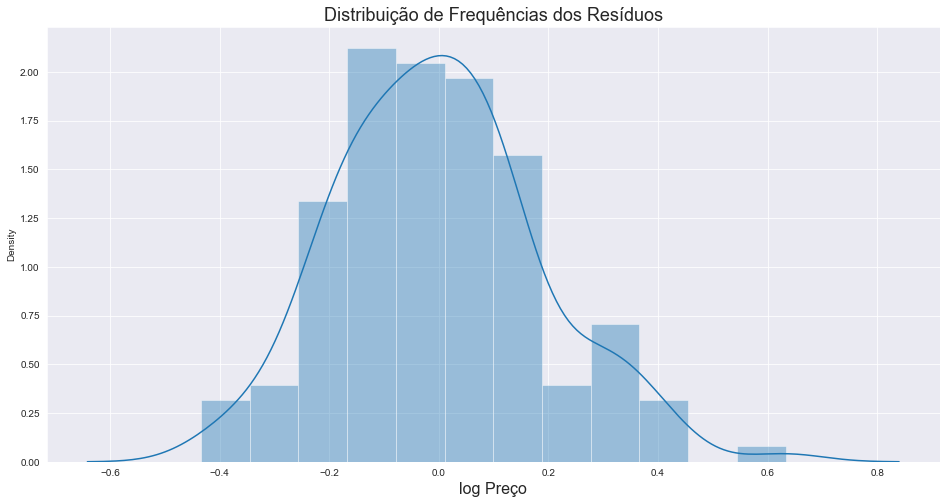

In [321]:
grafico = sns.distplot(residuo)
grafico.figure.set_size_inches(16, 8)
grafico.set_title('Distribuição de Frequências dos Resíduos', fontsize = 18)
grafico.set_xlabel('log Preço', fontsize = 16)
grafico

## Salvando e carregando o modelo estimado

In [322]:
import pickle

In [323]:
modelo_salvo = open('modelo_preco', 'wb')
pickle.dump(modelo, modelo_salvo)
modelo_salvo.close()